<a href="https://colab.research.google.com/github/openmymai/TensorFlowCert/blob/main/02_Neuron_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network with TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating data to view and fit

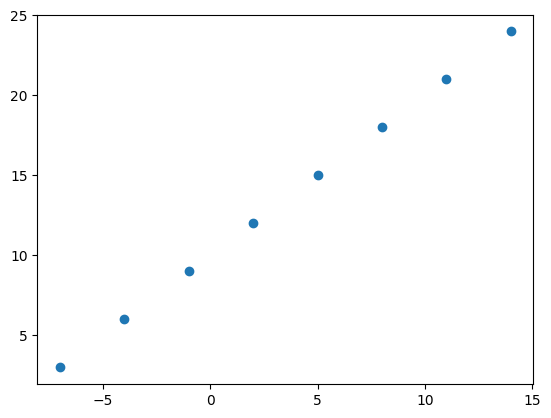

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualizing
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# create a demo tensor
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
# turn our NumPy array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

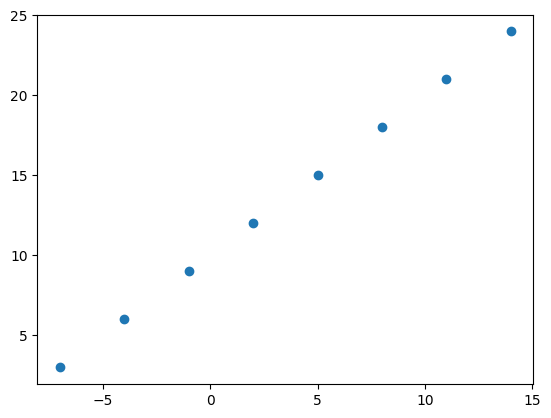

In [10]:
plt.scatter(X,y)

### steps in modelling with TensorFlow

1. creating a modelling - define input and output layers, as well as the hidden layers of a deep learning model.
2. Compile a model - define the loss function (inother words, the function tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performnce of our model).
3. Fitting a model - letting the model try to find pattern between X & y (features and labels).

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model using the Squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5) -> error after TF 2.7.0

# Fix error below
# The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 7.5975 - mae: 7.5975
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 7.4813 - mae: 7.4813
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 7.4756 - mae: 7.4756


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 75ms/step


array([[29.304405]], dtype=float32)

### Improving our model

- creating model
- compiling model
- fitting model


In [14]:
# change optimizer from SGD -> adam with lr parameter

In [15]:
# rebuild our model

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 360ms/step - loss: 19.6205 - mae: 19.6205
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 19.3393 - mae: 19.3393
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 19.0580 - mae: 19.0580
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 18.7768 - mae: 18.7768
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 18.4955 - mae: 18.4955
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 18.2143 - mae: 18.2143
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 17.9330 - mae: 17.9330
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 17.6518 - mae: 17.6518
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 17.3705 - mae: 17.3705
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 17.0893 - mae: 17.0893
Epoch 11/100
1/1 [==============================

In [16]:
model.predict([17.0])

1/1 [==============================] - 0s 56ms/step


array([[29.222559]], dtype=float32)

### Another improvement of our model

In [17]:
# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.5442 - mae: 13.5442
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8766 - mae: 12.8766
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2011 - mae: 12.2011
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5139 - mae: 11.5139
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8120 - mae: 10.8120
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0930 - mae: 10.0930
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.3551 - mae: 9.3551
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5963 - mae: 8.5963
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8147 - mae: 7.8147
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.0085 - mae: 7.0085
Epoch 11/100
1/1 [==============================] - 0s 11ms

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 88ms/step


array([[26.70738]], dtype=float32)

### Evaluating a model
In practice, a typical workflow you'll go through when building neural network is:

`Build a model -> fit it -> evaluate it -> tweak a model -> 
fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...`

When it comes to evaluation ... there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [19]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

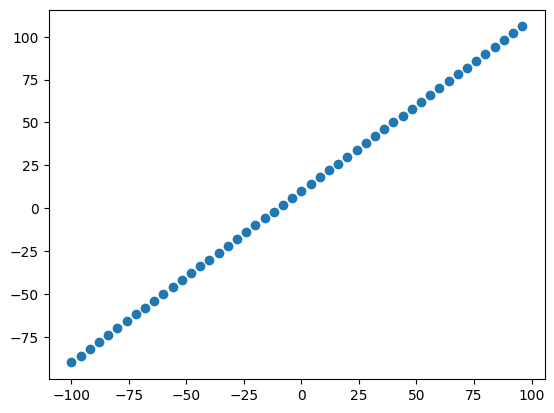

In [21]:
# Visualize the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X,y)

### The 3 sets
* Training set - the model learns from this data, which is typically 70-80% 
of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15%
of the data available.
* Test set - the model gets evaluated on this data to test what is has learned,
this set is typically 10-15% of the total data available.


In [22]:
len(X)

50

In [23]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualizing the data


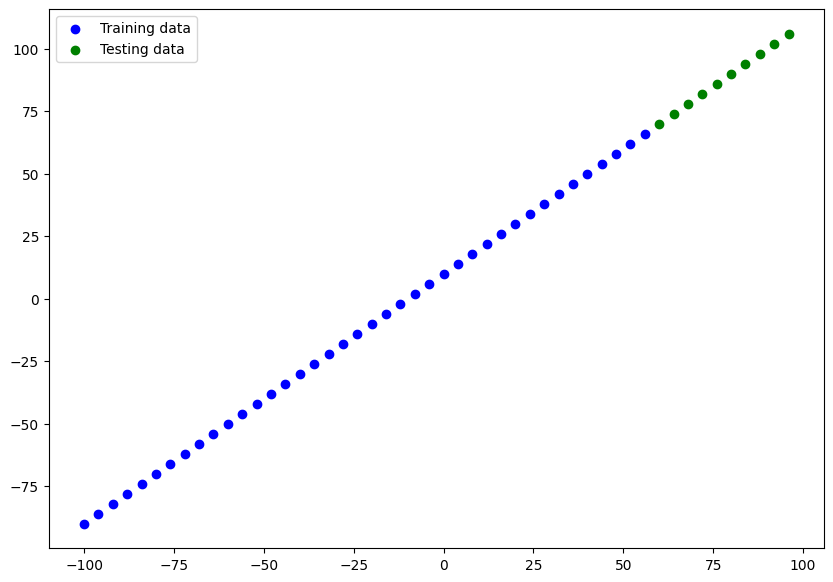

In [24]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

plt.legend()

In [25]:
# how to build neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

#### visualizing the model

In [26]:
model.summary()

ValueError: ignored

In [27]:
X.shape, X[0], y[0]

(TensorShape([50]),
 <tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [28]:
# create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (pattern)the model can update as it train.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning).

**Resources:** For a more in-depth overiew of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

**Exercise:** Try playing around with the number of hidden units in the desnse layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [30]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1) # verbose=0 silent, verbose=1 progress bar

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 50.0740 - mae: 50.0740
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 43.4594 - mae: 43.4594
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 37.1030 - mae: 37.1030
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 30.6321 - mae: 30.6321
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 24.3795 - mae: 24.3795
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 18.2627 - mae: 18.2627
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5143 - mae: 12.5143
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1001 - mae: 8.1001
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1450 - mae: 9.1450
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4743 - mae: 10.4743
Epoch 11/100
2/2 [==============================] - 0s 7ms/ste

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


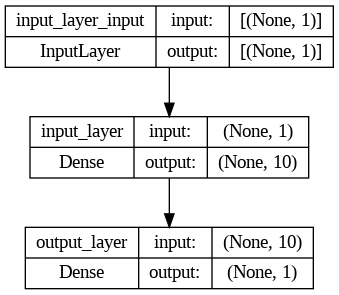

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### visualizing our model's prediction
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model)

In [33]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 68.269325],
       [ 72.152534],
       [ 76.03575 ],
       [ 79.91895 ],
       [ 83.80217 ],
       [ 87.68537 ],
       [ 91.56858 ],
       [ 95.45179 ],
       [ 99.33499 ],
       [103.2182  ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

# let's create a ploting function
**Note** If you feel like you're going to reuse some kind of functionality in the future

In [35]:
# create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  # plot training
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # plot testing
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # plot models prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

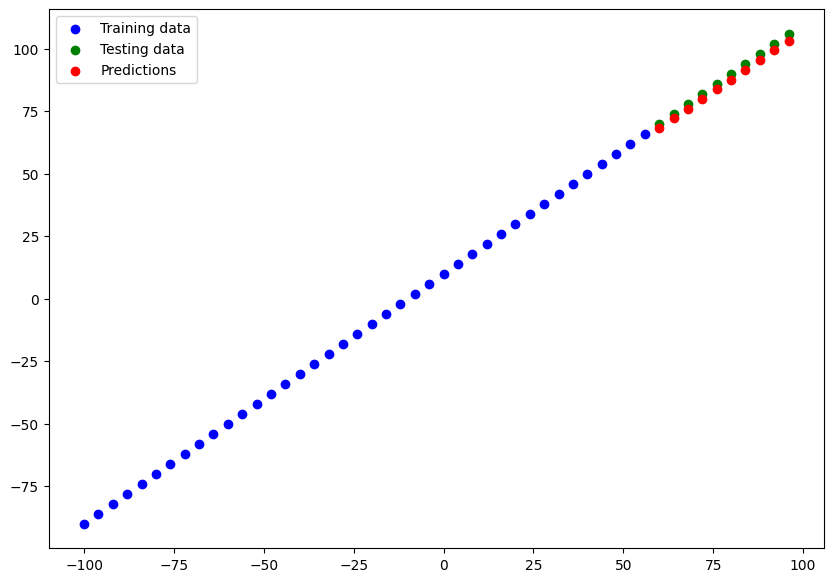

In [36]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluate our model's predictions

Depending on the problem you're working on, there will be defferent evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average error"

In [37]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 122ms/step - loss: 2.2562 - mae: 2.2562


[2.2562332153320312, 2.2562332153320312]

In [38]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.2562332>

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
tf.constant(y_pred) # different shape

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.269325],
       [ 72.152534],
       [ 76.03575 ],
       [ 79.91895 ],
       [ 83.80217 ],
       [ 87.68537 ],
       [ 91.56858 ],
       [ 95.45179 ],
       [ 99.33499 ],
       [103.2182  ]], dtype=float32)>

In [41]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.269325,  72.152534,  76.03575 ,  79.91895 ,  83.80217 ,
        87.68537 ,  91.56858 ,  95.45179 ,  99.33499 , 103.2182  ],
      dtype=float32)>

In [42]:
# try MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=5.203121>

In [43]:
# Make function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### improve model
* model_1 - same as original model, 1 layer, trained for 100 epochs
* model_2 - 2 layers, trained for 100 epochs
* model_3 - 2 layers, trained for 500 epochs

### build model_2

In [44]:
X_train.ndim, y_train.ndim

(1, 1)

In [45]:
# set random seed
tf.random.set_seed(42)

# 1. create a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 29.3381 - mae: 29.3381
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 25.6755 - mae: 25.6755
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 30.2891 - mae: 30.2891
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 20.6148 - mae: 20.6148
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 13.8591 - mae: 13.8591
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1455 - mae: 11.1455
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1669 - mae: 12.1669
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9193 - mae: 10.9193
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 38.0845 - mae: 38.0845
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 25.6583 - mae: 25.6583
Epoch 11/100
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 50ms/step


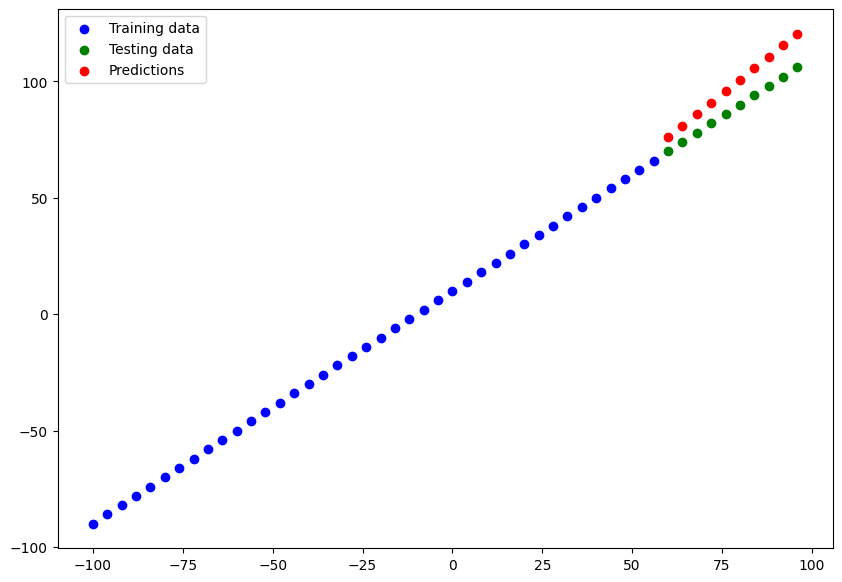

In [46]:
y_pred_2 = model2.predict(X_test)
plot_predictions(predictions=y_pred_2)


In [47]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.189799>,
 <tf.Tensor: shape=(), dtype=float32, numpy=111.21248>)

### Build model 3

In [48]:
# set seed
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 47ms/step


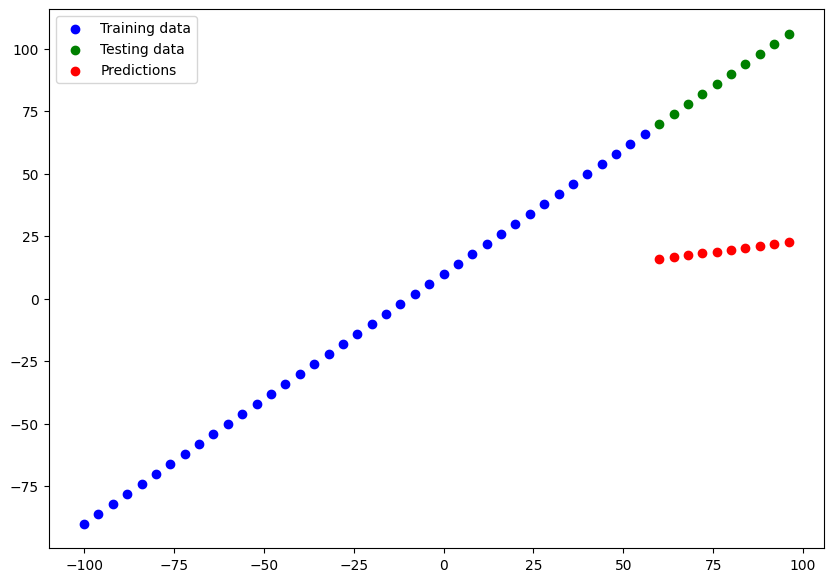

In [49]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [50]:
# cal model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.720085>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.9526>)

### Comparing the model

In [51]:
import pandas as pd
model_results = [["model2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model2,10.189799,111.212479
1,model_3,68.720085,4808.952637


In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [53]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# save model
1. SavedModel format
2. HDF5 format (.h5)

### A larger example

In [55]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plot

In [56]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [57]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [58]:
# convert string to numeric
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [59]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [60]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [61]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [62]:
# Build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8645.5771 - mae: 8645.5771
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7877.6934 - mae: 7877.6934
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7614.6909 - mae: 7614.6909
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7742.6602 - mae: 7742.6602
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7660.4565 - mae: 7660.4565
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7629.4570 - mae: 7629.4570
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7599.0864 - mae: 7599.0864
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7689.2754 - mae: 7689.2754
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7490.6157 - mae: 7490.6157
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.2515 - mae: 7698.2515

In [63]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 6121.4565 - mae: 6121.4565


[6121.45654296875, 6121.45654296875]

In [64]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [65]:
# Model not perform so well, try to improve

In [66]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model, add more layers in hidden layer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(0.01),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [67]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3165.7542 - mae: 3165.7542


[3165.754150390625, 3165.754150390625]

In [68]:
# another try

# set seed
tf.random.set_seed(42)

# 1. create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(0.01),
                          metrics=["mae"])

# 3. fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [69]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3201.6914 - mae: 3201.6914


[3201.69140625, 3201.69140625]

Text(0.5, 0, 'epochs')

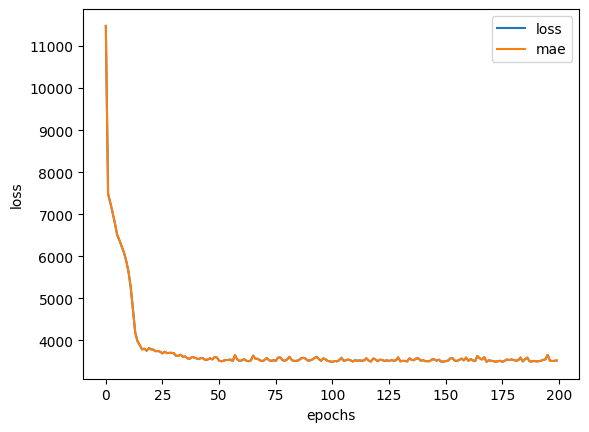

In [70]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Question: How long should you trian for?

It depends, it depends on the problem you're working on.
Many people have asked this question before.
So TensorFlow has a solution! It's called the **EarlyStopping Callback**, 
which is a TensorFlow component you can add to your model to stop training 
once it stops improving a certain metrics.

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.<br>
if you're not sure on which to use, you could try both and see which performs better.

In [79]:
import pandas as pd
import matplotlib.pyplot as plot
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

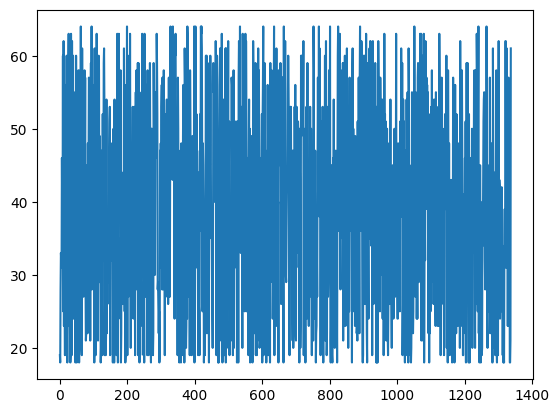

In [71]:
X["age"].plot()

<Axes: ylabel='Frequency'>

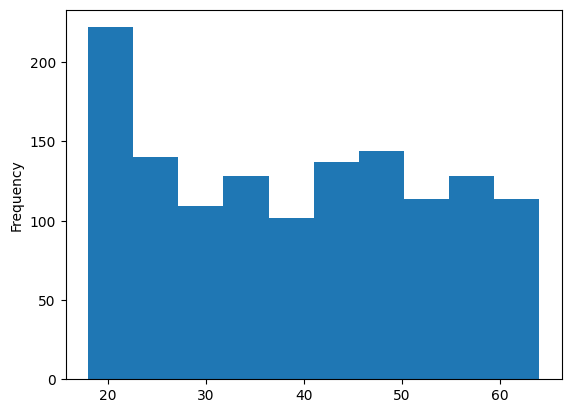

In [76]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

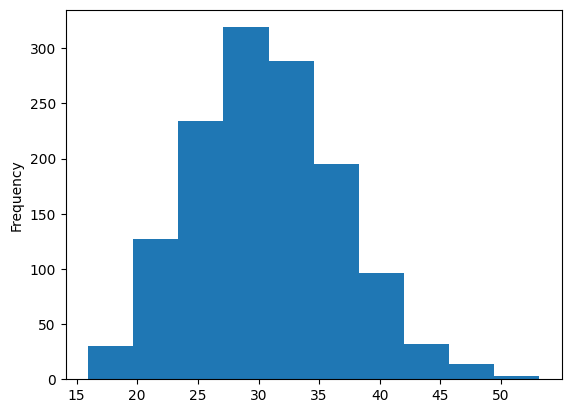

In [77]:
X["bmi"].plot(kind="hist")

In [78]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### To prepare our data, we can borrow a few classes from SK Learn

In [82]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turns all value between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build trian and test (X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization - MinMax, Onehot
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [84]:
# View data
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [86]:
# Compare normalization and standardization
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [87]:
# Build a neural network model

# set seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13343.1475 - mae: 13343.1475
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13332.7412 - mae: 13332.7412
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13307.6602 - mae: 13307.6602
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13256.2461 - mae: 13256.2461
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13166.7480 - mae: 13166.7480
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13028.0107 - mae: 13028.0107
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 12830.0469 - mae: 12830.0469
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12563.1016 - mae: 12563.1016
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12217.2695 - mae: 12217.2695
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 11791.86

In [88]:
# Evaluate our insurance model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3430.6379 - mae: 3430.6379


[3430.637939453125, 3430.637939453125]